In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("spam_text_message.csv")

In [4]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


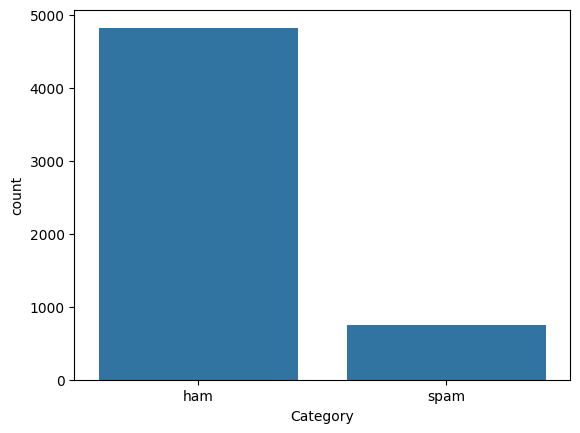

In [5]:
sns.countplot(x=df["Category"])
plt.show()

In [6]:
X=df["Message"]
Y=df["Category"]

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)
print(Y)

[0 0 1 ... 0 0 0]


In [8]:

X.shape

(5572,)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2)

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_words=500
tkn=Tokenizer(num_words=max_words)
tkn.fit_on_texts(X_train)
seq=tkn.texts_to_sequences(X_train)
# print(seq)

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len=100
padded_docs=pad_sequences(seq,padding="pre",maxlen=max_len)
print(padded_docs)


[[  0   0   0 ...   5 333   9]
 [  0   0   0 ...  31 483   2]
 [  0   0   0 ...  41  72  59]
 ...
 [  0   0   0 ... 183  67   9]
 [  0   0   0 ...  91  39 239]
 [  0   0   0 ...  96   9 300]]


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding


embedding_vector_features = 30
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_vector_features, input_length=max_len))
model.add(LSTM(256))
model.add(Dropout(0.5))  # Add dropout to prevent overfitting
model.add(Dense(1, activation="sigmoid"))

model.build(input_shape=(None, max_len))  # Build the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


model.summary()


c:\Github\my_projects\NLP.learn\spam_classification\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 30)        │        15,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 256)            │       293,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 309,145 (1.18 MB)

 Trainable params: 309,145 (1.18 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.fit(padded_docs,Y_train,batch_size=128,epochs=10,validation_split=0.2)

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - accuracy: 0.8062 - loss: 0.4914 - val_accuracy: 0.8722 - val_loss: 0.2752
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 143ms/step - accuracy: 0.9359 - loss: 0.2235 - val_accuracy: 0.9585 - val_loss: 0.1315
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9722 - loss: 0.0918 - val_accuracy: 0.9697 - val_loss: 0.1003
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.9797 - loss: 0.0713 - val_accuracy: 0.9720 - val_loss: 0.0910
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - accuracy: 0.9856 - loss: 0.0534 - val_accuracy: 0.9798 - val_loss: 0.0742
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.9886 - loss: 0.0472 - val_accuracy: 0.9809 - val_loss: 0.0729
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.9887 - loss: 0.0385 - val_accuracy: 0.9798 - val_loss: 0.0604
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.9914 - loss: 0.0290 - val_accuracy: 0.

In [14]:
text_seq=tkn.texts_to_sequences(X_test)
test_padded=pad_sequences(text_seq,maxlen=max_len)

In [15]:
accr=model.evaluate(test_padded,Y_test)
print(accr)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9840 - loss: 0.0434
[0.06083310395479202, 0.9793722033500671]


## Model.save()

In [18]:
model.save("mymodel.keras")

In [19]:
from tensorflow.keras.models import load_model
new_model=load_model("mymodel.keras")

In [20]:
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 30)        │        15,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 256)            │       293,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 927,437 (3.54 MB)

 Trainable params: 309,145 (1.18 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 618,292 (2.36 MB)

In [21]:
new_model.get_weights()

[array([[ 0.13806997,  0.12386769, -0.2769968 , ...,  0.12893897,
          0.07429777, -0.14848006],
        [ 0.24759026, -0.18337443,  0.14429155, ..., -0.09447183,
          0.15766107, -0.18251948],
        [ 0.01466905, -0.0093277 , -0.01137063, ...,  0.02060477,
         -0.03869527,  0.03941483],
        ...,
        [ 0.03801703, -0.07161755,  0.12453946, ..., -0.09171205,
          0.08407642, -0.03404594],
        [-0.04871027,  0.04369686, -0.11882068, ...,  0.14031613,
         -0.10694922,  0.06908727],
        [ 0.04862821, -0.01971862,  0.02346607, ..., -0.08732954,
          0.01985374,  0.0366582 ]], dtype=float32),
 array([[ 0.02062385,  0.02177656,  0.04725684, ..., -0.04819243,
         -0.03747229, -0.00912568],
        [-0.0467652 , -0.01523248, -0.07061365, ..., -0.02489975,
          0.1390198 , -0.05971753],
        [ 0.13406515, -0.0279826 ,  0.07973155, ..., -0.0198976 ,
         -0.10443486,  0.12084191],
        ...,
        [-0.13006455,  0.01664018, -0.0

In [22]:
new_model.optimizer

## Model.save_weights()

In [27]:
model.save_weights("model.weights.h5")

In [31]:
model2 = Sequential()
model2.add(Embedding(input_dim=max_words, output_dim=embedding_vector_features, input_length=max_len))
model2.add(LSTM(256))
model2.add(Dense(1, activation="sigmoid"))

# Build the model explicitly
model2.build(input_shape=(None, max_len))

# Compile the model
model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Load the pre-trained weights
model2.load_weights("model.weights.h5")

c:\Github\my_projects\NLP.learn\spam_classification\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
c:\Github\my_projects\NLP.learn\spam_classification\.venv\lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
